In [4]:
import pandas as pd
import numpy as np
import math
from IPython.display import Markdown, display
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt    
from dataHack import removeColl 
%matplotlib inline
import warnings
import scipy
warnings.filterwarnings('ignore')
%load_ext autotime
def printmd(string):
    display(Markdown(string))


In [5]:
response =pd.read_csv('responses.csv')

time: 184 ms


In [6]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
time: 100 ms


In [7]:
columns=pd.read_csv('columns.csv')

time: 46 ms


In [8]:
columns.head(7)

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country
5,Classical,Classical music
6,Musicals,Musical


time: 270 ms


In [9]:
musicPreference = response.ix[:,0:19 ]
moviePreferences = response.ix[:,19:31] 
hobbiesAndInterests =response.ix[:, 31:63 ]
phobia =response.ix[:,63:73 ]
healthhabits= response.ix[:,73:76 ]
personalityTraits=response.ix[:, 76:133 ]
spendingHabits =response.ix[:, 133:140 ]
demographics =response.ix[:,140:150]

time: 17 ms


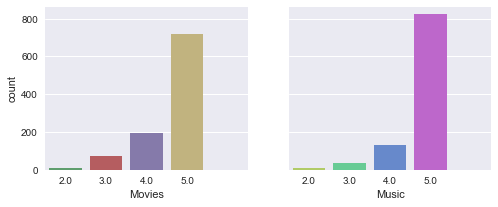

time: 646 ms


In [10]:
#Everyone loves movies & music, right?
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)

sns.countplot(response['Movies'], ax=ax1)
ax1.set_xlim(.5,5.5)

sns.countplot(response['Music'], ax=ax2, palette='hls')
ax2.set_xlim(.5,5.5)
ax2.set_ylabel('')

In [11]:
#Ttable(musicPreference,'Dance','Alternative')#.unstack()

time: 1e+03 µs


In [12]:
printmd('### '+str(1.0 * musicPreference.count().sum() / musicPreference.size))

### 0.99504950495

time: 67 ms


In [13]:
musicPreference.size-musicPreference.count().sum()

95

time: 77 ms


In [14]:
null_coll= musicPreference.columns[pd.isnull(musicPreference).any()].values.tolist()
x=0
for i in null_coll: 
    print i,' - ',len(musicPreference[musicPreference[i].isnull()])
    x=x+len(musicPreference[musicPreference[i].isnull()])

Music  -  3
Slow songs or fast songs  -  2
Dance  -  4
Folk  -  5
Country  -  5
Classical music  -  7
Musical  -  2
Pop  -  3
Rock  -  6
Metal or Hardrock  -  3
Punk  -  8
Hiphop, Rap  -  4
Reggae, Ska  -  7
Swing, Jazz  -  6
Rock n roll  -  7
Alternative  -  7
Latino  -  8
Techno, Trance  -  7
Opera  -  1
time: 116 ms


## Analyzing musicPreferences

In [15]:
musicPreference=musicPreference.fillna(musicPreference.mode().iloc[0])
    

time: 140 ms


In [16]:
#musicPreference.to_csv('musicPreference.csv',index=False)

time: 58 ms


In [17]:
def corrlist(data):
    feat=data.columns.tolist()
    corrmat=np.array(data.corr())
    for i in range(len(corrmat)):
        for j in range(len(corrmat)):
            if j>i :
                corrmat[i][j]=2
    corrFrame= pd.DataFrame(pd.DataFrame(corrmat,columns=feat,index=feat).unstack()).reset_index()
    print plt.matshow(corrmat)
    del corrmat
    corrFrame=corrFrame[corrFrame[0]<=1].rename(columns={0:'corr'})
    return corrFrame

time: 86 ms


AxesImage(60,36;310x310)


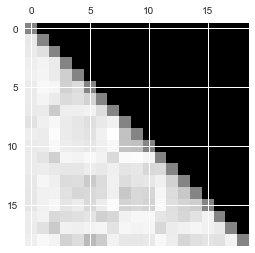

time: 278 ms


In [18]:
zc= corrlist(musicPreference)


In [19]:
musicPreference.drop('Music',1,inplace=True)

time: 5 ms


In [20]:
supportDict = {}
for column in musicPreference.columns:
    for i in range(1,6):
        supportDict[column+'_'+str(i)] = sum(musicPreference[column]==i)
 
# visualise support


time: 121 ms


In [21]:
#supportDict

time: 72 ms


In [22]:
itemset_1=pd.DataFrame(supportDict.values(),index=supportDict.keys(),columns={'support'}).sort_values('support')#,ascending=False)

time: 156 ms


### 1-itemset frequency

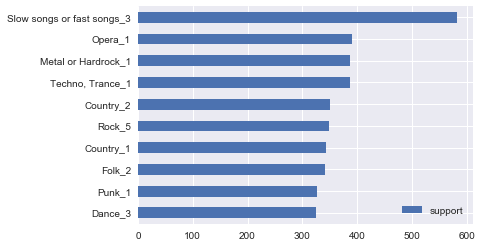

time: 387 ms


In [23]:
itemset_1.tail(10).plot(kind="barh")


In [24]:
itemset_1.tail(10).index.tolist()

['Dance_3',
 'Punk_1',
 'Folk_2',
 'Country_1',
 'Rock_5',
 'Country_2',
 'Techno, Trance_1',
 'Metal or Hardrock_1',
 'Opera_1',
 'Slow songs or fast songs_3']

time: 6 ms


In [25]:
supportDict = {}
for column1 in itemset_1.tail(10).index.tolist():
   
    for column2 in itemset_1.tail(10).index.tolist():
        if column2==column1:
            continue
        supportDict[column2+'_'+column1] =  len(musicPreference[(musicPreference[column1.split('_')[0]]==int(column1.split('_')[1]))&(musicPreference[column2.split('_')[0]]==int(column2.split('_')[1]))][[column1.split('_')[0],column2.split('_')[0]]]) 
# visualise support


time: 225 ms


In [26]:
itemset_2=pd.DataFrame(supportDict.values(),index=supportDict.keys(),columns={'support'}).sort_values('support')

time: 4 ms


### 2-itemset frequency

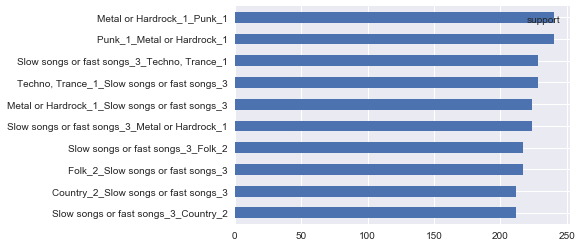

time: 349 ms


In [27]:
itemset_2.tail(10).plot(kind="barh")

In [28]:
from apriori import apriori, generateRules

time: 12 ms


In [29]:
L,supportData=apriori(musicPreference,0.7)
brl=generateRules(L, supportData,0.7)
print 'brl:',brl


brl: []
time: 3 ms
